   X   Y
0  1   4
1  2   6
2  3   9
3  4  11
4  5  18


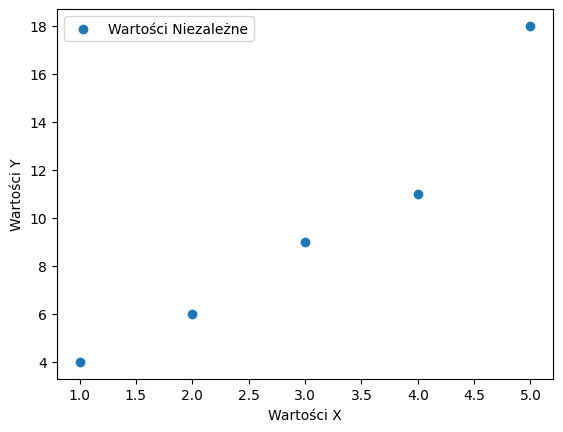

In [1]:
# zad 1 

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import warnings
warnings.filterwarnings("ignore")

def srednia(a):
    sr = 0
    for x in a:
        sr += x
    return sr/len(a)

def odchylenie(a):
    od = 0
    sr = srednia(a)
    for x in a:
        od += (x-sr)**2
    return np.sqrt(od/(len(a)-1))

def wsp_korelacji_pearsona(n, pearson):
    return (n * pearson.loc["sum","xy"] - pearson.loc["sum","X"] * pearson.loc["sum","Y"]) /\
    np.sqrt((n * pearson.loc["sum","x2"] - (pearson.loc["sum","X"])**2) *\
             (n * pearson.loc["sum","y2"] - (pearson.loc["sum","Y"])**2))
    
def linia_regresji(x):
    return (b*x) + a


df = pd.DataFrame()
df['X'] = [1, 2, 3, 4, 5]
df['Y'] = [4, 6, 9, 11, 18]

print(df)
plt.scatter(df['X'], df['Y'], label = 'Wartości Niezależne')
plt.xlabel('Wartości X')
plt.ylabel('Wartości Y')
plt.legend()
plt.show()

Średnia X:  3.0
Średnia Y:  9.6
Średnia X z gotowej funkcji:  3.0
Średnia Y z gotowej funkcji:  9.6


Odchylenie standardowe X:  1.5811388300841898
Odchylenie standardowe Y:  5.412947441089743
Odchylenie standardowe X z gotowej funkcji:  1.4142135623730951
Odchylenie standardowe Y z gotowej funkcji:  4.841487374764082


n =  5

      X   Y   y2   xy  x2
0     1   4   16    4   1
1     2   6   36   12   4
2     3   9   81   27   9
3     4  11  121   44  16
4     5  18  324   90  25
sum  15  48  578  177  55


Korelacja pearsona r:  0.963940292431027
Korelacja pearsona r z gotowej funkcji:  0.9639402924310271


Współczynnik a:  -0.3000000000000007
Współczynnik b:  3.3000000000000003
Otrzymana fukncja liniowa: y = 3.3000000000000003 * x - -0.3000000000000007


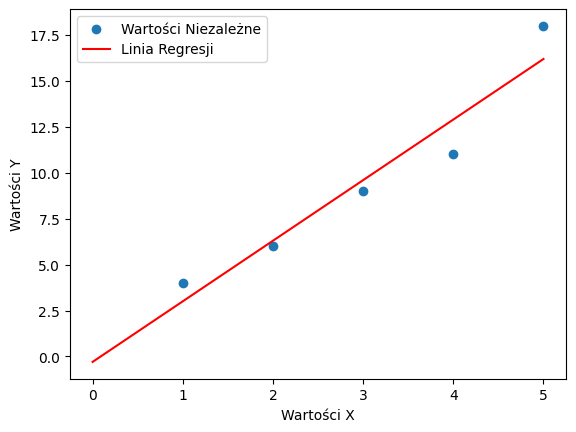

,X,Y
0,1.0,4.0
1,2.0,6.0
2,3.0,9.0
3,4.0,11.0
4,5.0,18.0
5,6.0,NaN


In [2]:
print("Średnia X: ",srednia(df['X']))
print("Średnia Y: ",srednia(df['Y']))
print("Średnia X z gotowej funkcji: ",np.mean(df['X']))
print("Średnia Y z gotowej funkcji: ",np.mean(df['Y']))

print("\n\nOdchylenie standardowe X: ",odchylenie(df['X']))
print("Odchylenie standardowe Y: ",odchylenie(df['Y']))
print("Odchylenie standardowe X z gotowej funkcji: ",np.std(df['X']))
print("Odchylenie standardowe Y z gotowej funkcji: ",np.std(df['Y']))

n = len(df['X'])
pearson = pd.DataFrame(df[:])
pearson['y2'] = df['Y'] * df['Y']
pearson['xy'] = df['X'] * df['Y']
pearson['x2'] = df['X'] * df['X']
pearson['y2'] = df['Y'] * df['Y']
pearson.loc['sum'] = pearson.sum()
print("\n\nn = ", n)
print()
print(pearson)
print("\n\nKorelacja pearsona r: ",wsp_korelacji_pearsona(n, pearson))
print("Korelacja pearsona r z gotowej funkcji: ", scipy.stats.pearsonr(df['X'],df['Y'])[0])

Mx = srednia(df['X'])
My = srednia(df['Y'])
Sx = odchylenie(df['X'])
Sy = odchylenie(df['Y'])
r = wsp_korelacji_pearsona(n, pearson)

b = r * Sy/Sx
a = My - b * Mx
print("\n\nWspółczynnik a: ",a)
print("Współczynnik b: ",b)
print("Otrzymana fukncja liniowa: y = %s * x - %s" % (b, a))
x = np.linspace(0, 5, 1000)
plt.scatter(df['X'], df['Y'], label ='Wartości Niezależne')
plt.plot(x, linia_regresji(x), 'r', label='Linia Regresji')
plt.xlabel('Wartości X')
plt.ylabel('Wartości Y')
plt.legend()
plt.show()

df = df.append({'X': 6, 'Y': np.nan}, ignore_index = True)
df

In [3]:
def predict_y(x, b, a):
    return b*x +a
df.at[5, 'Y'] = predict_y(df['X'][5], b, a)
df

,X,Y
0,1.0,4.0
1,2.0,6.0
2,3.0,9.0
3,4.0,11.0
4,5.0,18.0
5,6.0,19.5


In [4]:
df = df.append({'X': 7, 'Y': np.nan}, ignore_index = True)
df = df.append({'X': 8, 'Y': np.nan}, ignore_index = True)
df

,X,Y
0,1.0,4.0
1,2.0,6.0
2,3.0,9.0
3,4.0,11.0
4,5.0,18.0
5,6.0,19.5
6,7.0,NaN
7,8.0,NaN


In [5]:
df.at[6, 'Y'] = predict_y(df['X'][6], b, a)
df.at[7, 'Y'] = predict_y(df['X'][7], b, a)
df

,X,Y
0,1.0,4.0
1,2.0,6.0
2,3.0,9.0
3,4.0,11.0
4,5.0,18.0
5,6.0,19.5
6,7.0,22.8
7,8.0,26.1
